In [1]:
CBDF_dict = {}

Tmax prior mean

In [2]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4000, 5000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
k = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))
for j in range(len(Tmax_mean_array)):
    n_genes = n_genes_array[k]
    Tmax_mean = Tmax_mean_array[j]
    Tmax_sd = Tmax_sd_array[j]
    seed = seeds[i]
    module_factor = module_multiplication[l]
    save_name = method + '_Tmax_' + str(j)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[j,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)

Global seed set to 0


(Running UniTVelo 0.2.5.2)
2024-03-10 17:59:06


2024-03-10 17:59:07.243660: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-10 17:59:07.243711: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-10 17:59:07.245701: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
CBDF_dict['Tmax']  = CBDC_df

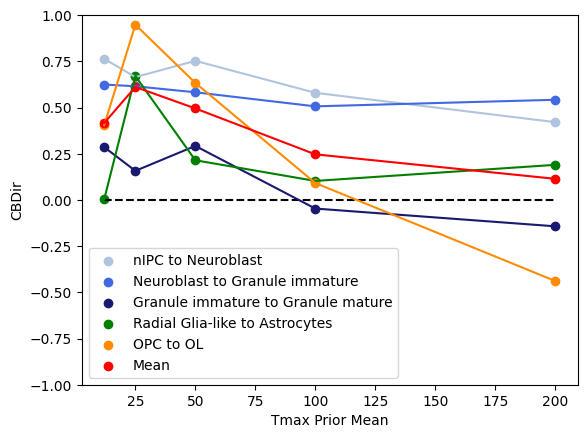

In [4]:
transitions = CBDC_df.columns
colors = ['lightsteelblue', 'royalblue', 'midnightblue', 'green', 'darkorange', 'red']
plt.hlines(y = 0, xmin = np.min(Tmax_mean_array), xmax = np.max(Tmax_mean_array),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    plt.scatter(Tmax_mean_array, CBDC_df.loc[:,transitions[i]], label = transitions[i], color = colors[i])
    plt.plot(Tmax_mean_array, CBDC_df.loc[:,transitions[i]], color = colors[i])
    plt.ylim(-1,1)
    plt.ylabel('CBDir')
    plt.xlabel('Tmax Prior Mean')
    plt.legend()

Number of clusters to number of modules factor:

In [5]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4000, 5000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
k = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))
for l in range(len(module_multiplication)):
    n_genes = n_genes_array[k]
    Tmax_mean = Tmax_mean_array[j]
    Tmax_sd = Tmax_sd_array[j]
    seed = seeds[i]
    module_factor = module_multiplication[l]
    save_name = method + '_n_modules_' + str(l)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[l,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)

In [6]:
CBDF_dict['Modules']  = CBDC_df

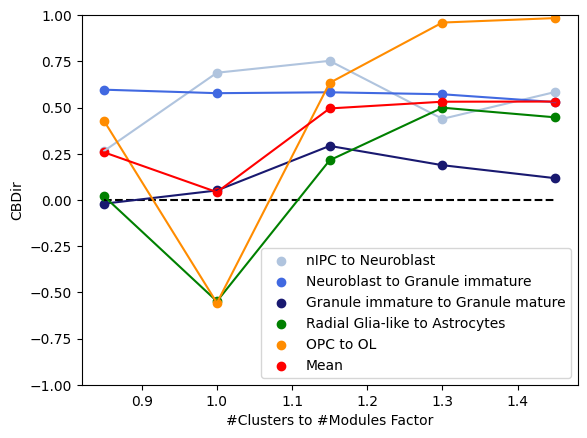

In [7]:
transitions = CBDC_df.columns
colors = ['lightsteelblue', 'royalblue', 'midnightblue', 'green', 'darkorange', 'red']
plt.hlines(y = 0, xmin = np.min(module_multiplication), xmax = np.max(module_multiplication),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    plt.scatter(module_multiplication, CBDC_df.loc[:,transitions[i]], label = transitions[i], color = colors[i])
    plt.plot(module_multiplication, CBDC_df.loc[:,transitions[i]], color = colors[i])
    plt.ylim(-1,1)
    plt.ylabel('CBDir')
    plt.xlabel('#Clusters to #Modules Factor')
    plt.legend()

Number of Genes

In [8]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))
for k in range(len(n_genes_array)):
    n_genes = n_genes_array[k]
    Tmax_mean = Tmax_mean_array[j]
    Tmax_sd = Tmax_sd_array[j]
    seed = seeds[i]
    module_factor = module_multiplication[l]
    save_name = method + '_nGenes_' + str(k)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[k,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)         

In [9]:
CBDF_dict['NGenes']  = CBDC_df

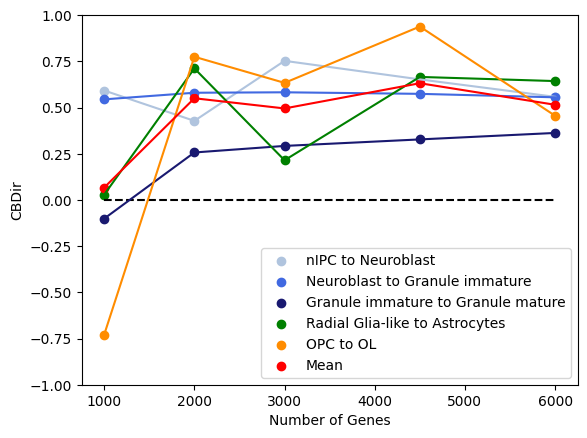

In [10]:
transitions = CBDC_df.columns
colors = ['lightsteelblue', 'royalblue', 'midnightblue', 'green', 'darkorange', 'red']
plt.hlines(y = 0, xmin = np.min(n_genes_array), xmax = np.max(n_genes_array),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    plt.scatter(n_genes_array, CBDC_df.loc[:,transitions[i]], label = transitions[i], color = colors[i])
    plt.plot(n_genes_array, CBDC_df.loc[:,transitions[i]], color = colors[i])
    plt.ylim(-1,1)
    plt.ylabel('CBDir')
    plt.xlabel('Number of Genes')
    plt.legend()

v_ag

In [11]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))
v_ag_alpha_array = np.array((1.0, 3.0, 6.0, 10.0, 20.0))

for k in range(len(v_ag_alpha_array)):
    n_genes = n_genes_array[k]
    Tmax_mean = Tmax_mean_array[j]
    Tmax_sd = Tmax_sd_array[j]
    seed = seeds[i]
    module_factor = module_multiplication[l]
    save_name = method + '_v_ag_alpha_' + str(k)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[k,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)         

In [12]:
CBDF_dict['v_ag']  = CBDC_df

Detection alpha

In [13]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))
detection_alpha = np.array((1., 5., 10., 20., 100.))

for k in range(len(detection_alpha)):
    save_name = method + '_detection_alpha_' + str(k)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[k,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)         

In [14]:
CBDF_dict['detection_alpha']  = CBDC_df

In [15]:
CBDF_dict['detection_alpha']

,nIPC to Neuroblast,Neuroblast to Granule immature,Granule immature to Granule mature,Radial Glia-like to Astrocytes,OPC to OL,Mean
0,0.572393,0.568222,0.352303,0.467274,-0.039545,0.384129
1,0.512829,0.541148,0.339342,0.603268,0.441577,0.487633
2,0.463605,0.476034,0.329881,0.310627,0.677174,0.451464
3,0.644607,0.518374,0.345298,0.63512,0.097361,0.448152
4,0.582585,0.505118,0.366639,0.540184,0.39879,0.478663


Beta

In [16]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))

beta_prior_arg1 =  np.array((1.0,2.0,4.0,0.5,0.25))

for j in range(5):
    save_name = method + '_beta_' + str(j)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[j,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)  

In [17]:
CBDF_dict['beta']  = CBDC_df

In [18]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))

gamma_prior_arg1 =  np.array((1.0,2.0,4.0,0.5,0.25))

for j in range(5):
    save_name = method + '_gamma_' + str(j)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[j,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)  

In [19]:
CBDF_dict['gamma']  = CBDC_df

In [20]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))

gamma_prior_arg1 =  np.array((1.0,2.0,4.0,0.5,0.25))

for j in range(5):
    save_name = method + '_betaGamma1_' + str(j)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[j,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)  

In [21]:
CBDF_dict['Betagamma']  = CBDC_df

In [22]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((12., 25., 50., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))

Tmax_mean_array = np.array((12., 25., 50., 100., 200.))

for j in range(5):
    save_name = method + '_Tmax_' + str(j)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[j,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)  

In [23]:
CBDF_dict['TmaxMean']  = CBDC_df

In [24]:
# import os
# os.chdir('..')
# os.chdir('..')
import scvelo as scv
import scanpy as sc
import scvi
import pickle as pickle
from eval_utils import cross_boundary_correctness
from datetime import datetime
import pandas as pd
import numpy as np
from os.path import exists
import matplotlib.pyplot as plt
import torch
import unitvelo as utv
import cell2fate as c2f
method = 'Cell2fateDynamicalModel_DentateGyrus_RobustnessAnalysis'
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
save_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_results/DentateGyrus_Robustness/'
dataset = 'DentateGyrus'
n_genes_array = np.array((1000, 2000, 3000, 4500, 6000))
min_counts = 10
Tmax_mean_array = np.array((50., 12., 25., 100., 200.))
Tmax_sd_array = np.array((12., 25., 50., 100., 200.))
module_multiplication = np.array((0.85, 1.0, 1.15, 1.3, 1.45))
seeds = np.array((0,1,2,3,4))

j = 0
i = 0
l = 2
CBDC_df = pd.DataFrame(columns = [ 'nIPC to Neuroblast', 'Neuroblast to Granule immature',
                         'Granule immature to Granule mature', 'Radial Glia-like to Astrocytes',
                         'OPC to OL'], index = list(range(5)))

Tmax_sd_array = np.array((12., 25., 50., 100., 200.))

for j in range(5):
    save_name = method + '_TmaxSDOnly_' + str(j)
    with open(save_dir + save_name + '.pickle', 'rb') as handle:
        post_sample_means = pickle.load(handle)
        CBDC_df.iloc[j,:] = list(post_sample_means['CBDC'].values())
CBDC_df['Mean'] = np.mean(CBDC_df, axis = 1)  

In [25]:
CBDF_dict['TmaxSD']  = CBDC_df

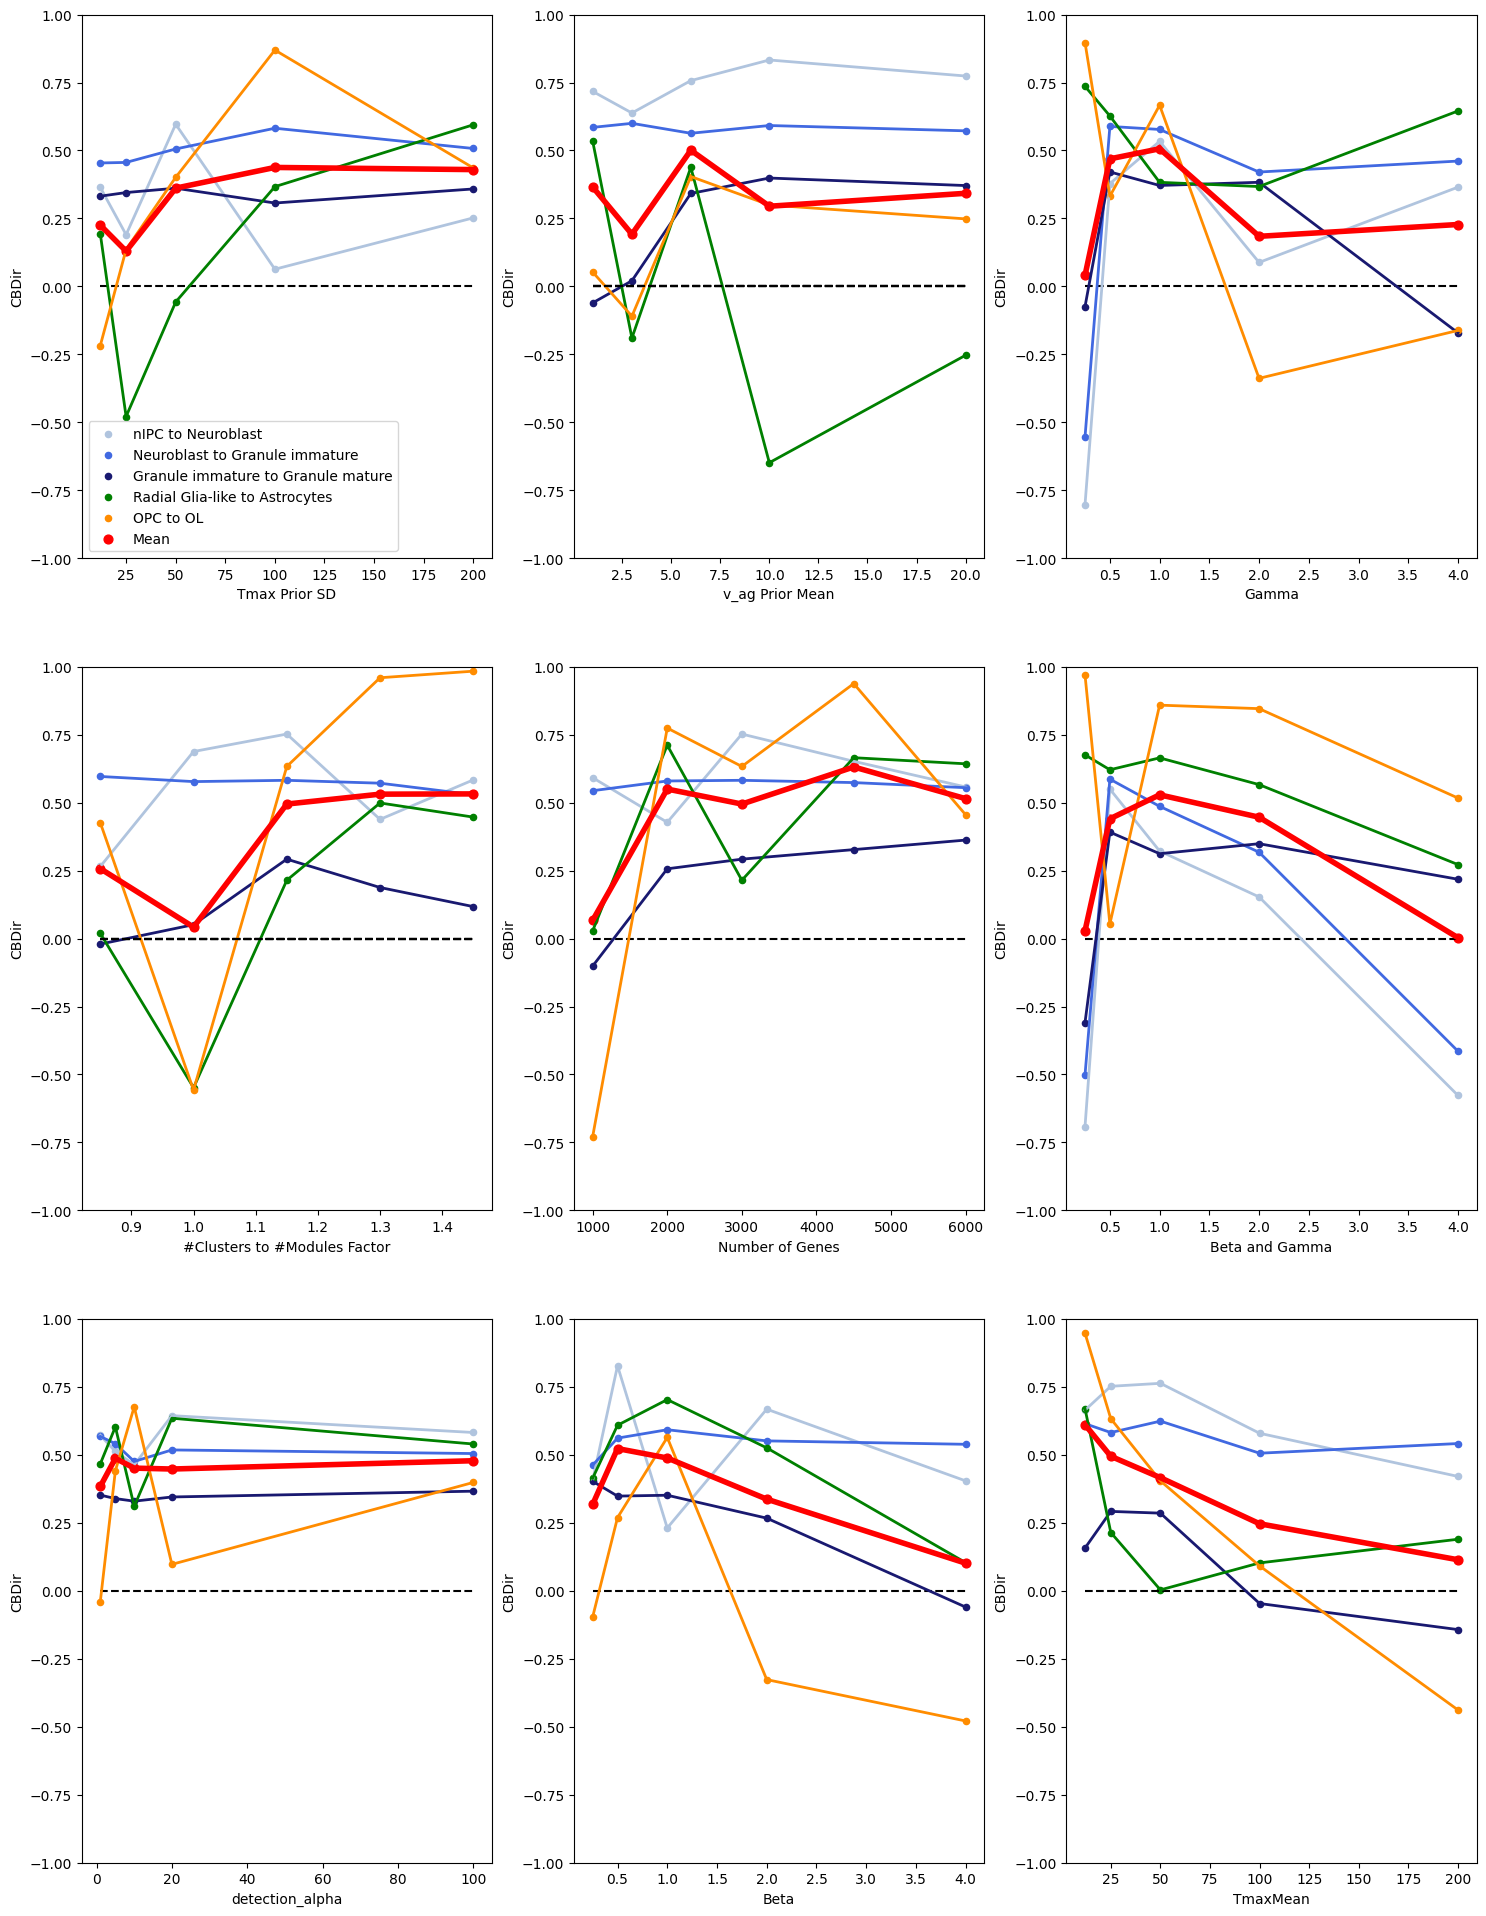

In [30]:
transitions = CBDC_df.columns
fig,ax = plt.subplots(3,3, figsize = (18,24))
colors = ['lightsteelblue', 'royalblue', 'midnightblue', 'green', 'darkorange', 'red']
linewidth = [2, 2, 2, 2, 2, 4]
size = [20,20,20,20,20,40]
ax[0,0].hlines(y = 0, xmin = np.min(Tmax_sd_array), xmax = np.max(Tmax_sd_array),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[0,0].scatter(Tmax_sd_array, CBDF_dict['TmaxSD'].loc[:,transitions[i]], label = transitions[i], color = colors[i],
                   s = size[i])
    ax[0,0].plot(Tmax_sd_array, CBDF_dict['TmaxSD'].loc[:,transitions[i]], color = colors[i], linewidth = linewidth[i])
    ax[0,0].set_ylim(-1,1)
    ax[0,0].set_ylabel('CBDir')
    ax[0,0].set_xlabel('Tmax Prior SD')
    ax[0,0].legend()
for i in range(len(transitions)):
    ax[1,0].scatter(module_multiplication, CBDF_dict['Modules'].loc[:,transitions[i]], label = transitions[i], color = colors[i], s = size[i])
    ax[1,0].plot(module_multiplication, CBDF_dict['Modules'].loc[:,transitions[i]], color = colors[i], linewidth = linewidth[i])
    ax[1,0].set_ylim(-1,1)
    ax[1,0].set_ylabel('CBDir')
    ax[1,0].set_xlabel('#Clusters to #Modules Factor')
    ax[1,0].hlines(y = 0, xmin = np.min(module_multiplication), xmax = np.max(module_multiplication),
                   linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[0,1].scatter(v_ag_alpha_array, CBDF_dict['v_ag'].loc[:,transitions[i]], label = transitions[i], color = colors[i], s = size[i])
    ax[0,1].plot(v_ag_alpha_array, CBDF_dict['v_ag'].loc[:,transitions[i]], color = colors[i], linewidth = linewidth[i])
    ax[0,1].set_ylim(-1,1)
    ax[0,1].set_ylabel('CBDir')
    ax[0,1].set_xlabel('v_ag Prior Mean')
    ax[0,1].hlines(y = 0, xmin = np.min(v_ag_alpha_array), xmax = np.max(v_ag_alpha_array), linestyles = 'dashed', color = 'black')
ax[1,1].hlines(y = 0, xmin = np.min(n_genes_array), xmax = np.max(n_genes_array),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[1,1].scatter(n_genes_array, CBDF_dict['NGenes'] .loc[:,transitions[i]], label = transitions[i],
                    color = colors[i], s = size[i])
    ax[1,1].plot(n_genes_array, CBDF_dict['NGenes'] .loc[:,transitions[i]], color = colors[i], linewidth = linewidth[i])
    ax[1,1].set_ylim(-1,1)
    ax[1,1].set_ylabel('CBDir')
    ax[1,1].set_xlabel('Number of Genes')
ax[2,0].hlines(y = 0, xmin = np.min(detection_alpha), xmax = np.max(detection_alpha),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[2,0].scatter(detection_alpha, CBDF_dict['detection_alpha'] .loc[:,transitions[i]], label = transitions[i],
                    color = colors[i], s = size[i])
    ax[2,0].plot(detection_alpha, CBDF_dict['detection_alpha'] .loc[:,transitions[i]], color = colors[i], linewidth = linewidth[i])
    ax[2,0].set_ylim(-1,1)
    ax[2,0].set_ylabel('CBDir')
    ax[2,0].set_xlabel('detection_alpha')
ax[2,1].hlines(y = 0, xmin = np.min(beta_prior_arg1), xmax = np.max(beta_prior_arg1),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[2,1].scatter(np.sort(beta_prior_arg1), CBDF_dict['beta'].loc[:,transitions[i]].iloc[np.argsort(beta_prior_arg1)], label = transitions[i],
                    color = colors[i], s = size[i])
    ax[2,1].plot(np.sort(beta_prior_arg1), CBDF_dict['beta'].loc[:,transitions[i]].iloc[np.argsort(beta_prior_arg1)], color = colors[i], linewidth = linewidth[i])
    ax[2,1].set_ylim(-1,1)
    ax[2,1].set_ylabel('CBDir')
    ax[2,1].set_xlabel('Beta')
ax[0,2].hlines(y = 0, xmin = np.min(beta_prior_arg1), xmax = np.max(beta_prior_arg1),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[0,2].scatter(np.sort(gamma_prior_arg1), CBDF_dict['gamma'].loc[:,transitions[i]].iloc[np.argsort(gamma_prior_arg1)], label = transitions[i],
                    color = colors[i], s = size[i])
    ax[0,2].plot(np.sort(gamma_prior_arg1), CBDF_dict['gamma'].loc[:,transitions[i]].iloc[np.argsort(gamma_prior_arg1)], color = colors[i], linewidth = linewidth[i])
    ax[0,2].set_ylim(-1,1)
    ax[0,2].set_ylabel('CBDir')
    ax[0,2].set_xlabel('Gamma')
ax[1,2].hlines(y = 0, xmin = np.min(beta_prior_arg1), xmax = np.max(beta_prior_arg1),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[1,2].scatter(np.sort(gamma_prior_arg1), CBDF_dict['Betagamma'].loc[:,transitions[i]].iloc[np.argsort(gamma_prior_arg1)], label = transitions[i],
                    color = colors[i], s = size[i])
    ax[1,2].plot(np.sort(gamma_prior_arg1), CBDF_dict['Betagamma'].loc[:,transitions[i]].iloc[np.argsort(gamma_prior_arg1)], color = colors[i], linewidth = linewidth[i])
    ax[1,2].set_ylim(-1,1)
    ax[1,2].set_ylabel('CBDir')
    ax[1,2].set_xlabel('Beta and Gamma')
ax[2,2].hlines(y = 0, xmin = np.min(Tmax_mean_array), xmax = np.max(Tmax_mean_array),
              linestyles = 'dashed', color = 'black')
for i in range(len(transitions)):
    ax[2,2].scatter(Tmax_mean_array[np.argsort(Tmax_mean_array)], CBDF_dict['TmaxMean'].loc[:,transitions[i]].iloc[np.argsort(Tmax_mean_array)], label = transitions[i],
                    color = colors[i], s = size[i])
    ax[2,2].plot(Tmax_mean_array[np.argsort(Tmax_mean_array)], CBDF_dict['TmaxMean'].loc[:,transitions[i]].iloc[np.argsort(Tmax_mean_array)], color = colors[i],
                 linewidth = linewidth[i])
    ax[2,2].set_ylim(-1,1)
    ax[2,2].set_ylabel('CBDir')
    ax[2,2].set_xlabel('TmaxMean')
plt.savefig('/nfs/team283/aa16/cell2fate_paper_results/RevisionFigures/RobustnessBenchmark.pdf')

In [27]:
Tmax_mean_array

array([ 50.,  12.,  25., 100., 200.])

In [28]:
CBDF_dict['TmaxMean']

,nIPC to Neuroblast,Neuroblast to Granule immature,Granule immature to Granule mature,Radial Glia-like to Astrocytes,OPC to OL,Mean
0,0.763535,0.624386,0.285795,0.003305,0.404553,0.416315
1,0.664756,0.615003,0.157345,0.670434,0.947996,0.611107
2,0.752609,0.582406,0.29223,0.214568,0.633339,0.495030
3,0.579711,0.506335,-0.046722,0.102745,0.09151,0.246716
4,0.420895,0.541949,-0.142708,0.189782,-0.438507,0.114282


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
planets = sns.load_dataset("planets")

p = sns.stripplot(x="variable", y="value", data=all_results.melt(), size=4, hue = "variable",
                  palette=['lightsteelblue', 'royalblue', 'midnightblue', 'green', 'darkorange', 'red'])
plt.xticks(rotation=45, ha="right")
plt.ylim(-1,1)

# plot the mean line
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="variable",
            y="value",
            data=all_results.melt(),
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.hlines(y = 0, xmin = -1, xmax = 6,
              linestyles = 'dashed', color = 'black')
plt.show()

NameError: name 'all_results' is not defined

In [ ]:
all_results.loc['Var',:] = np.var(all_results, axis = 0)

In [ ]:
all_results

In [ ]:
data_dir = '/nfs/team283/aa16/data/fate_benchmarking/benchmarking_datasets/'
dataset = 'DentateGyrus'
adata = sc.read_h5ad(data_dir + dataset + '/' + dataset + '_anndata.h5ad')

In [ ]:
cell_tab = pd.DataFrame(columns = ['nIPC to Neuroblast', 'Neuroblast to Granule immature', 'Granule immature to Granule mature',
                       'Radial Glia-like to Astrocytes', 'OPC to OL'], index = ['Number of Cells'])

In [ ]:
all_counts = adata.obs['clusters'].value_counts()
cell_tab.loc['Number of Cells', 'nIPC to Neuroblast'] = all_counts['nIPC'] + all_counts['Neuroblast']
cell_tab.loc['Number of Cells', 'Neuroblast to Granule immature'] = all_counts['Granule immature'] + all_counts['Neuroblast']
cell_tab.loc['Number of Cells', 'Granule immature to Granule mature'] = all_counts['Granule immature'] + all_counts['Granule mature']
cell_tab.loc['Number of Cells', 'Radial Glia-like to Astrocytes'] = all_counts['Radial Glia-like'] + all_counts['Astrocytes']
cell_tab.loc['Number of Cells', 'OPC to OL'] = all_counts['OPC'] + all_counts['OL']
cell_tab

In [ ]:
plt.scatter(np.array(cell_tab), [np.sqrt(x) for x in all_results.loc['Var', cell_tab.columns]])